In [ ]:
# import libaries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas_profiling

In [169]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [170]:
df = pd.read_csv('mnist_test.csv')

In [171]:
df.shape

(10000, 785)

In [172]:
# Investigate Data
type(df)
df.size
df.shape
df.head()
df.tail()

pandas.core.frame.DataFrame

7850000

(10000, 785)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
9999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [173]:
pd.core.frame.DataFrame

pandas.core.frame.DataFrame

In [174]:
print ('Overall data summary')
df.describe()
df.shape

Overall data summary


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0,4.443400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0,2.895865
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0,9.000000


(10000, 785)

eda_report = pandas_profiling.ProfileReport(df)
eda_report.to_file("MNIST_EDA_Pandas_Profiling.html")

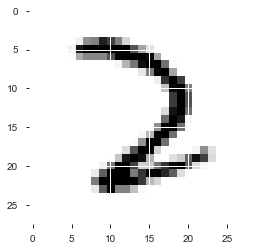

In [175]:
sample_row=115
sample_row=df.iloc[sample_row,:-1]
transfered_row=sample_row.values.reshape(28,28)
plt.imshow(transfered_row)
plt.show()

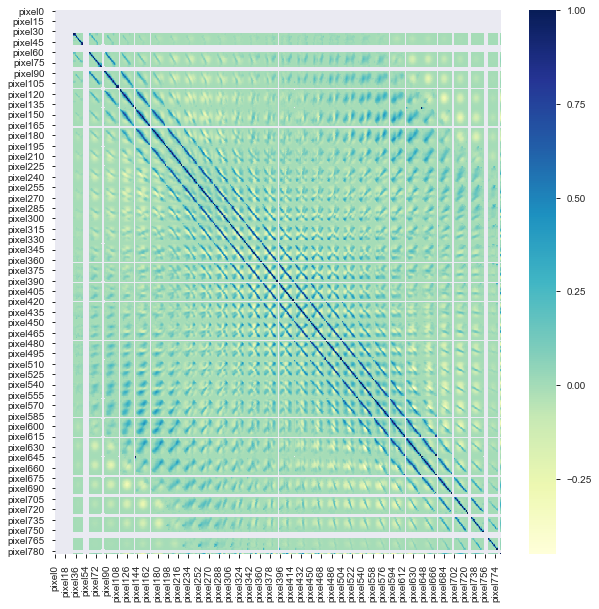

In [176]:
x = df.corr()
x
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap="YlGnBu")
plt.show();

In [177]:


# Create Features and Labels and Standardize data
Y = df.iloc[:,784]
X= df.iloc[:,0:784]
std = StandardScaler()
X_Features= std.fit_transform(X)


In [178]:
# Create train and test data 80% and 20% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.20, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(8000, 784)

(2000, 784)

(8000,)

(2000,)

numpy.ndarray

In [184]:
np.ndarray
# Build Deep Learning Model
model = Sequential()
model.add(Dense(1024, input_dim =784))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('tanh'))
#model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer='Adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 


numpy.ndarray

In [185]:
train_x = np.array(train_x)
train_y = np.array(train_y)


In [186]:
# Fit the model
model.fit(train_x,train_y, epochs=15, batch_size=32)

Epoch 1/15
8000/8000 [==============================] - 5s 593us/step - loss: 0.5403 - acc: 0.8387
Epoch 2/15
8000/8000 [==============================] - 5s 606us/step - loss: 0.1424 - acc: 0.9554
Epoch 3/15
8000/8000 [==============================] - 4s 472us/step - loss: 0.0663 - acc: 0.9806
Epoch 4/15
8000/8000 [==============================] - 4s 464us/step - loss: 0.0279 - acc: 0.9920 0s - loss: 0.0278 - ac
Epoch 5/15
8000/8000 [==============================] - 4s 474us/step - loss: 0.0132 - acc: 0.9962
Epoch 6/15
8000/8000 [==============================] - 5s 604us/step - loss: 0.0049 - acc: 0.9992
Epoch 7/15
8000/8000 [==============================] - 4s 484us/step - loss: 0.0028 - acc: 0.9995
Epoch 8/15
8000/8000 [==============================] - 4s 466us/step - loss: 0.0018 - acc: 0.9998
Epoch 9/15
8000/8000 [==============================] - 4s 471us/step - loss: 0.0013 - acc: 1.0000
Epoch 10/15
8000/8000 [==============================] - 5s 594us/step - loss: 8.5935e

In [187]:
# evaluate the model
scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2000/2000 [==============================] - 1s 284us/step

acc: 95.70%


In [188]:
classes = model.predict_classes(test_x, batch_size=32, verbose=0)
print (classes.size)
print('Positive Cases in Test Data:', test_y[test_y == 1].shape[0])
print('Neagtive Cases in Test Data:', test_y[test_y == 0].shape[0])
print()
print()
print ('Accuracy Score')
print (metrics.accuracy_score(test_y, classes))
print (metrics.classification_report(test_y,classes))

2000
Positive Cases in Test Data: 225
Neagtive Cases in Test Data: 192


Accuracy Score
0.957
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       192
           1       0.99      0.98      0.98       225
           2       0.95      0.97      0.96       220
           3       0.96      0.93      0.95       205
           4       0.95      0.95      0.95       219
           5       0.93      0.94      0.94       177
           6       0.96      0.98      0.97       177
           7       0.96      0.95      0.96       230
           8       0.96      0.94      0.95       158
           9       0.93      0.93      0.93       197

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

